In [1]:
%matplotlib notebook

import numpy as np
import mrcfile

In [2]:
f_path = 'best_class_average.mrc'

with mrcfile.open(f_path) as mrc:
    print(mrc.data.shape)
    print(mrc.voxel_size)
    print(mrc.data.dtype)
    print(mrc.header)
    old_header = mrc.header
    old_vsize = mrc.voxel_size

(432, 432)
(2.31, 2.31, 2.31)
float32
(432, 432, 1, 2, 0, 0, 0, 432, 432, 1, (997.92, 997.92, 2.31), (90.0, 90.0, 90.0), 1, 2, 3, -7.1708074, 15.010006, 1.0975521, 0, 0, b'\x01\x00\x00\x00\x6F\x66\xF0\xC7', b'', 0, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', (0.0, 0.0, 0.0), b'MAP ', [68, 68,  0,  0], 0.0, 0, [b'', b'', b'', b'', b'', b'', b'', b'', b'', b''])


In [3]:
mask = np.zeros((432, 432), dtype=np.float32)

for j in range(432):
    for k in range(432):
        d = np.sqrt(np.abs(j-215)**2 + np.abs(k-215)**2)
        if 79 <= d <= 109:
            mask[j, k] = 1

In [4]:
with mrcfile.new('2Dtarget_as_binary_mask.mrc', overwrite=True) as mrc:
    mrc.set_data(mask)
    mrc.voxel_size = old_vsize
    mrc.set_extended_header(old_header)

In [5]:
with mrcfile.open('2Dtarget_as_binary_mask.mrc') as mrc:
    print(mrc.data.shape)
    print(mrc.voxel_size)
    print(mrc.data.dtype)
    print(mrc.header)

(432, 432)
(2.31, 2.31, 2.31)
float32
(432, 432, 1, 2, 0, 0, 0, 432, 432, 1, (997.92, 997.92, 2.31), (90.0, 90.0, 90.0), 1, 2, 3, 0.0, 1.0, 0.09497171, 0, 1024, b'\x00\x00\x00\x00\x00\x00\x00\x00', b'', 20141, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', (0.0, 0.0, 0.0), b'MAP ', [68, 68,  0,  0], 0.29317585, 1, [b'Created by mrcfile.py                                       2026-01-02 16:12:04 ', b'', b'', b'', b'', b'', b'', b'', b'', b''])


In [6]:
f_path = 'best_class_average.mrc'

with mrcfile.open(f_path) as mrc:
    print(mrc.data.shape)
    print(mrc.voxel_size)
    print(mrc.data.dtype)
    print(mrc.header)
    data = mrc.data
    old_header = mrc.header
    old_vsize = mrc.voxel_size

(432, 432)
(2.31, 2.31, 2.31)
float32
(432, 432, 1, 2, 0, 0, 0, 432, 432, 1, (997.92, 997.92, 2.31), (90.0, 90.0, 90.0), 1, 2, 3, -7.1708074, 15.010006, 1.0975521, 0, 0, b'\x01\x00\x00\x00\x6F\x66\xF0\xC7', b'', 0, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', (0.0, 0.0, 0.0), b'MAP ', [68, 68,  0,  0], 0.0, 0, [b'', b'', b'', b'', b'', b'', b'', b'', b'', b''])


In [7]:
binary_data = np.zeros((432, 432), dtype=np.float32)
threshold = 5.0

for j in range(432):
    for k in range(432):
        if data[j, k] <= threshold:
            binary_data[j, k] = 0
        else:
            binary_data[j, k] = 1

In [8]:
with mrcfile.new('best_class_average_binary_50.mrc', overwrite=True) as mrc:
    mrc.set_data(binary_data)
    mrc.voxel_size = old_vsize
    mrc.set_extended_header(old_header)

In [9]:
# CORRELATION AND VISUALIZATION

with mrcfile.open('best_class_average_binary.mrc') as mrc:
    print(mrc.voxel_size)
    data_observed = mrc.data
    
with mrcfile.open('2Dtarget_as_binary_mask.mrc') as mrc:
    print(mrc.voxel_size)
    data_target = mrc.data

(2.31, 2.31, 2.31)
(2.31, 2.31, 2.31)


In [11]:
intersection = np.sum(data_observed * data_target)
union = np.sum(data_observed) + np.sum(data_target) - intersection

iou = intersection/union

print("Intersection over union is {:.4f}.".format(intersection/union))

Intersection over union is 0.6298.


<IPython.core.display.Javascript object>


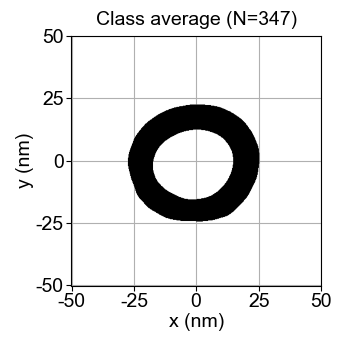

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as cols
import matplotlib.patches as mpatches

cm = (1/2.54)

plt.rcParams["font.sans-serif"] = ['Arial']

cmap_1 = cols.ListedColormap([(1, 1, 1, 0), "black"])
cmap_2 = cols.ListedColormap([(1, 1, 1, 0), "red", "blue"])

f1 = plt.figure()
f1.set_figwidth(0.55*16.5*cm)
f1.set_figheight(0.55*16.5*cm)
ax = f1.add_subplot(1, 1, 1, position=[0.2, 0.2, 0.7, 0.7])
ax.imshow(data_observed, origin='lower', cmap=cmap_1, zorder=10)
ax.tick_params(labelsize=14, pad=2)
ax.set_xticks([0, 108, 215, 324, 431], labels=["-50", "-25", "0", "25", "50"])
ax.set_yticks([0, 108, 215, 324, 431], labels=["-50", "-25", "0", "25", "50"])
ax.set_xlabel("x (nm)", fontsize=14, labelpad=1); ax.set_ylabel("y (nm)", fontsize=14, labelpad=1);
f1.suptitle("Class average (N=347)", x=0.55, y=0.92, fontsize=14, ha='center',va='bottom');
ax.grid()
plt.show()

f1.savefig("panel_1.png", dpi=900, transparent=True)

<IPython.core.display.Javascript object>


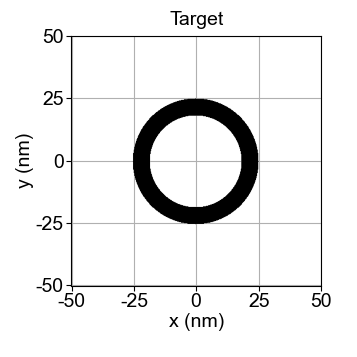

In [13]:
f2 = plt.figure()
f2.set_figwidth(0.55*16.5*cm)
f2.set_figheight(0.55*16.5*cm)
ax = f2.add_subplot(1, 1, 1, position=[0.2, 0.2, 0.7, 0.7])
ax.imshow(data_target, origin='lower', cmap=cmap_1, zorder=10)
ax.tick_params(labelsize=14, pad=2)
ax.set_xticks([0, 108, 215, 324, 431], labels=["-50", "-25", "0", "25", "50"])
ax.set_yticks([0, 108, 215, 324, 431], labels=["-50", "-25", "0", "25", "50"])
ax.set_xlabel("x (nm)", fontsize=14, labelpad=1); ax.set_ylabel("y (nm)", fontsize=14, labelpad=1);
f2.suptitle("Target", x=0.55, y=0.92, fontsize=14, ha='center',va='bottom');
ax.grid()
plt.show()
f2.savefig("panel_2.png", dpi=900, transparent=True)

<IPython.core.display.Javascript object>


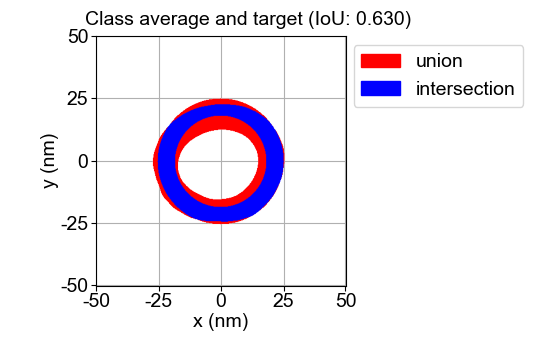

In [14]:
f3 = plt.figure()
f3.set_figwidth(0.85*16.5*cm)
f3.set_figheight(0.55*16.5*cm)
ax = f3.add_subplot(1, 1, 1, position=[0.05, 0.2, 0.7, 0.7])
im = ax.imshow(data_target + data_observed, origin='lower', cmap=cmap_2, zorder=10)
ax.tick_params(labelsize=14, pad=2)
ax.set_xticks([0, 108, 215, 324, 431], labels=["-50", "-25", "0", "25", "50"])
ax.set_yticks([0, 108, 215, 324, 431], labels=["-50", "-25", "0", "25", "50"])
ax.set_xlabel("x (nm)", fontsize=14, labelpad=1); ax.set_ylabel("y (nm)", fontsize=14, labelpad=1);
f3.suptitle("Class average and target (IoU: {:.3f})".format(iou), x=0.45, y=0.92, fontsize=14, ha='center',va='bottom');

red_patch = mpatches.Patch(color='red', label="union")
blue_patch = mpatches.Patch(color='blue', label="intersection")
leg = ax.legend(handles=[red_patch, blue_patch], fontsize=14, loc='upper right', bbox_to_anchor=(1.75, 1.0))
ax.grid()
plt.show()
f3.savefig("panel_3.png", dpi=900, transparent=True)